# Lead Scoring Case Study

Import modules

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### Read the Data

In [3]:
leads = pd.read_csv("Leads.csv")

### Understanding the data

In [4]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
# The Dimensions of the dataframe
leads.shape

(9240, 37)

In [6]:
# The statistical aspects of the dataframe
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# The type of each columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Cleaning the Data

In [8]:
# Converting 'Select' values to NaN.
leads = leads.replace("Select", np.nan)

In [9]:
# Summarising number of missing values in each column
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# percentage of missing values in each column
round(leads.isnull().sum()/len(leads.index), 2)*100 # type: ignore

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

Removing the columns having more than 60% missing values

In [11]:
missing_columns = leads.columns[100*(leads.isnull().sum()/len(leads.index))>60]
missing_columns

Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

In [12]:
# droping those columns
leads = leads.drop(missing_columns, axis=1)

In [13]:
leads.shape

(9240, 35)

In [14]:
# summarise number of missing values again
(leads.isnull().sum()/len(leads.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [15]:
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

We can impute Lead Quality with 'Not Sure' in place of NaN

In [16]:
leads['Lead Quality'] = leads['Lead Quality'].replace(np.nan, 'Not Sure')

In [17]:
leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

As large number of leads are from India we can impute missing value as 'India'

In [18]:
leads.Country = leads.Country.replace(np.nan, 'India')

In [19]:
def clean_country(x):
    
    if x == "India":
        return x
    else:
        return "Outside India"

leads.Country = leads.Country.apply(clean_country)

In [20]:
leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We can Impute Missing cities with Mumbai

In [21]:
leads.City = leads.City.replace(np.nan, 'Mumbai')

In [22]:
leads.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

There are various Specializations in the list. We can create 'Others' as a new column for the unknown/missing values

In [23]:
leads.Specialization = leads.Specialization.replace(np.nan, "Others")

In [24]:
leads["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Impute missing 29% with Unemployed

In [25]:
leads["What is your current occupation"] = leads["What is your current occupation"].replace(np.nan, "Unemployed")

In [26]:
leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We can simply drop this column has ~100% of the values same

In [27]:
leads = leads.drop(["What matters most to you in choosing a course"], axis=1)

In [28]:
leads.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

Impute missing values with most common Tag

In [29]:
leads.Tags = leads.Tags.replace(np.nan, "Will revert after reading the email")

We can drop the Activity Index & Score and Profile Index & Score

In [30]:
drop_cols = ["Asymmetrique Profile Score", "Asymmetrique Activity Score", "Asymmetrique Profile Index", "Asymmetrique Activity Index"]
leads = leads.drop(drop_cols, axis=1)

In [31]:
leads["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Cleaning Lead Source Column

In [32]:
def rename_lead_source(incorrect_name='', correct_name=''):
    leads.loc[(leads["Lead Source"]==incorrect_name), "Lead Source"] = correct_name

In [33]:
# Renaming inconsistant naming
rename_lead_source("google", "Google")
rename_lead_source("bing", "Bing")
rename_lead_source("youtubechannel", "Youtube Channel")
rename_lead_source("welearnblog_Home", "WeLearn")
rename_lead_source("blog", "WeLearn")

Imputing NaN with Google in Lead Source

In [34]:
leads["Lead Source"] = leads["Lead Source"].replace(np.nan, "Google")

In [35]:
leads["Lead Source"].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Bing                    6
Click2call              4
WeLearn                 3
Social Media            2
Live Chat               2
Press_Release           2
testone                 1
Pay per Click Ads       1
Youtube Channel         1
NC_EDM                  1
Name: Lead Source, dtype: int64

Total Visits Column

In [36]:
leads.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

We can impute missing values with median

In [37]:
leads.TotalVisits = leads.TotalVisits.replace(np.nan, leads.TotalVisits.median())

Page Views Per Visit Column

In [38]:
leads["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

We can impute missing values with mean

In [39]:
leads["Page Views Per Visit"] = leads["Page Views Per Visit"].replace(np.nan, leads["Page Views Per Visit"].mean())

Last Activity Column

In [40]:
leads["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [41]:
leads["Last Activity"] = leads["Last Activity"].replace(np.nan, "Email Opened")

In [42]:
# summarise number of missing values again
(leads.isnull().sum()/len(leads.index))*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now, All the columns have 0% missing values

Now, Lets check if a row has large number of missing values

In [43]:
# missing values in rows
leads.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
9235    0
9236    0
9237    0
9238    0
9239    0
Length: 9240, dtype: int64

In [44]:
len(leads[leads.isnull().sum(axis=1) > 4].index)

0

Droping ID as all values are unique

In [45]:
leads = leads.drop('Prospect ID', axis=1)

Let's also check whether all columns are in the correct format.

In [46]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Lead Origin                               9240 non-null   object 
 2   Lead Source                               9240 non-null   object 
 3   Do Not Email                              9240 non-null   object 
 4   Do Not Call                               9240 non-null   object 
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9240 non-null   float64
 7   Total Time Spent on Website               9240 non-null   int64  
 8   Page Views Per Visit                      9240 non-null   float64
 9   Last Activity                             9240 non-null   object 
 10  Country                             

### Data Preparation

In [47]:
binary_cols = ["Do Not Email", "Do Not Call", "Search", 
               "Magazine", "Newspaper Article", "X Education Forums", 
               "Newspaper", "Digital Advertisement", "Through Recommendations",
               "Receive More Updates About Our Courses", "Update me on Supply Chain Content",
               "Get updates on DM Content", "I agree to pay the amount through cheque",
               "A free copy of Mastering The Interview"]

In [48]:
def binary_map(x):
    return x.map({"Yes" : 1, "No" : 0})

In [49]:
leads[binary_cols] = leads[binary_cols].apply(binary_map)

In [50]:
leads[binary_cols].describe()

Do Not Email  Do Not Call       Search  Magazine  Newspaper Article  \
count   9240.000000  9240.000000  9240.000000    9240.0        9240.000000   
mean       0.079437     0.000216     0.001515       0.0           0.000216   
std        0.270435     0.014711     0.038898       0.0           0.014711   
min        0.000000     0.000000     0.000000       0.0           0.000000   
25%        0.000000     0.000000     0.000000       0.0           0.000000   
50%        0.000000     0.000000     0.000000       0.0           0.000000   
75%        0.000000     0.000000     0.000000       0.0           0.000000   
max        1.000000     1.000000     1.000000       0.0           1.000000   

       X Education Forums    Newspaper  Digital Advertisement  \
count         9240.000000  9240.000000            9240.000000   
mean             0.000108     0.000108               0.000433   
std              0.010403     0.010403               0.020803   
min              0.000000     0.000000               0.000000   
25%              0.000000     0.000000               0.000000   
50%              0.000000     0.000000               0.000000   
75%              0.000000     0.000000               0.000000   
max              1.000000     1.000000               1.000000   

       Through Recommendations  Receive More Updates About Our Courses  \
count              9240.000000                                  9240.0   
mean                  0.000758                                     0.0   
std                   0.027515                                     0.0   
min                   0.000000                                     0.0   
25%                   0.000000                                     0.0   
50%                   0.000000                                     0.0   
75%                   0.000000                                     0.0   
max                   1.000000                                     0.0   

       Update me on Supply Chain Content  Get updates on DM Content  \
count                             9240.0                     9240.0   
mean                                 0.0                        0.0   
std                                  0.0                        0.0   
min                                  0.0                        0.0   
25%                                  0.0                        0.0   
50%                                  0.0                        0.0   
75%                                  0.0                        0.0   
max                                  0.0                        0.0   

       I agree to pay the amount through cheque  \
count                                    9240.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

       A free copy of Mastering The Interview  
count                             9240.000000  
mean                                 0.312554  
std                                  0.463559  
min                                  0.000000  
25%                                  0.000000  
50%                                  0.000000  
75%                                  1.000000  
max                                  1.000000

In [51]:
# Numerical Variables from the dataset
numerical_variables = [
    "Lead Number",
    "Do Not Email",
    "Do Not Call",
    "TotalVisits",
    "Converted",
    "Total Time Spent on Website",
    "Page Views Per Visit",
    "Search", 
    "Magazine",
    "Newspaper Article",
    "X Education Forums", 
    "Newspaper",
    "Digital Advertisement",
    "Through Recommendations",
    "Receive More Updates About Our Courses",
    "Update me on Supply Chain Content",
    "Get updates on DM Content",
    "I agree to pay the amount through cheque",
    "A free copy of Mastering The Interview"
]

In [52]:
# Numerical Variables excluding all Binary Variables
numerical_variables_ex_binary = [
    "TotalVisits",
    "Total Time Spent on Website",
    "Page Views Per Visit"
]

In [53]:
# Categorical Variables in dataset
categorical_variables = [
    "Lead Origin",
    "Lead Source",
    "Last Activity",
    "Country",
    "Specialization",
    "What is your current occupation",
    "Tags",
    "Lead Quality",
    "City",
    "Last Notable Activity"
]

In [54]:
for item in categorical_variables:
    leads[item].astype('category')

## Visualizing the Data

In [55]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Lead Origin                               9240 non-null   object 
 2   Lead Source                               9240 non-null   object 
 3   Do Not Email                              9240 non-null   int64  
 4   Do Not Call                               9240 non-null   int64  
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9240 non-null   float64
 7   Total Time Spent on Website               9240 non-null   int64  
 8   Page Views Per Visit                      9240 non-null   float64
 9   Last Activity                             9240 non-null   object 
 10  Country                             

### Univariate Analysis

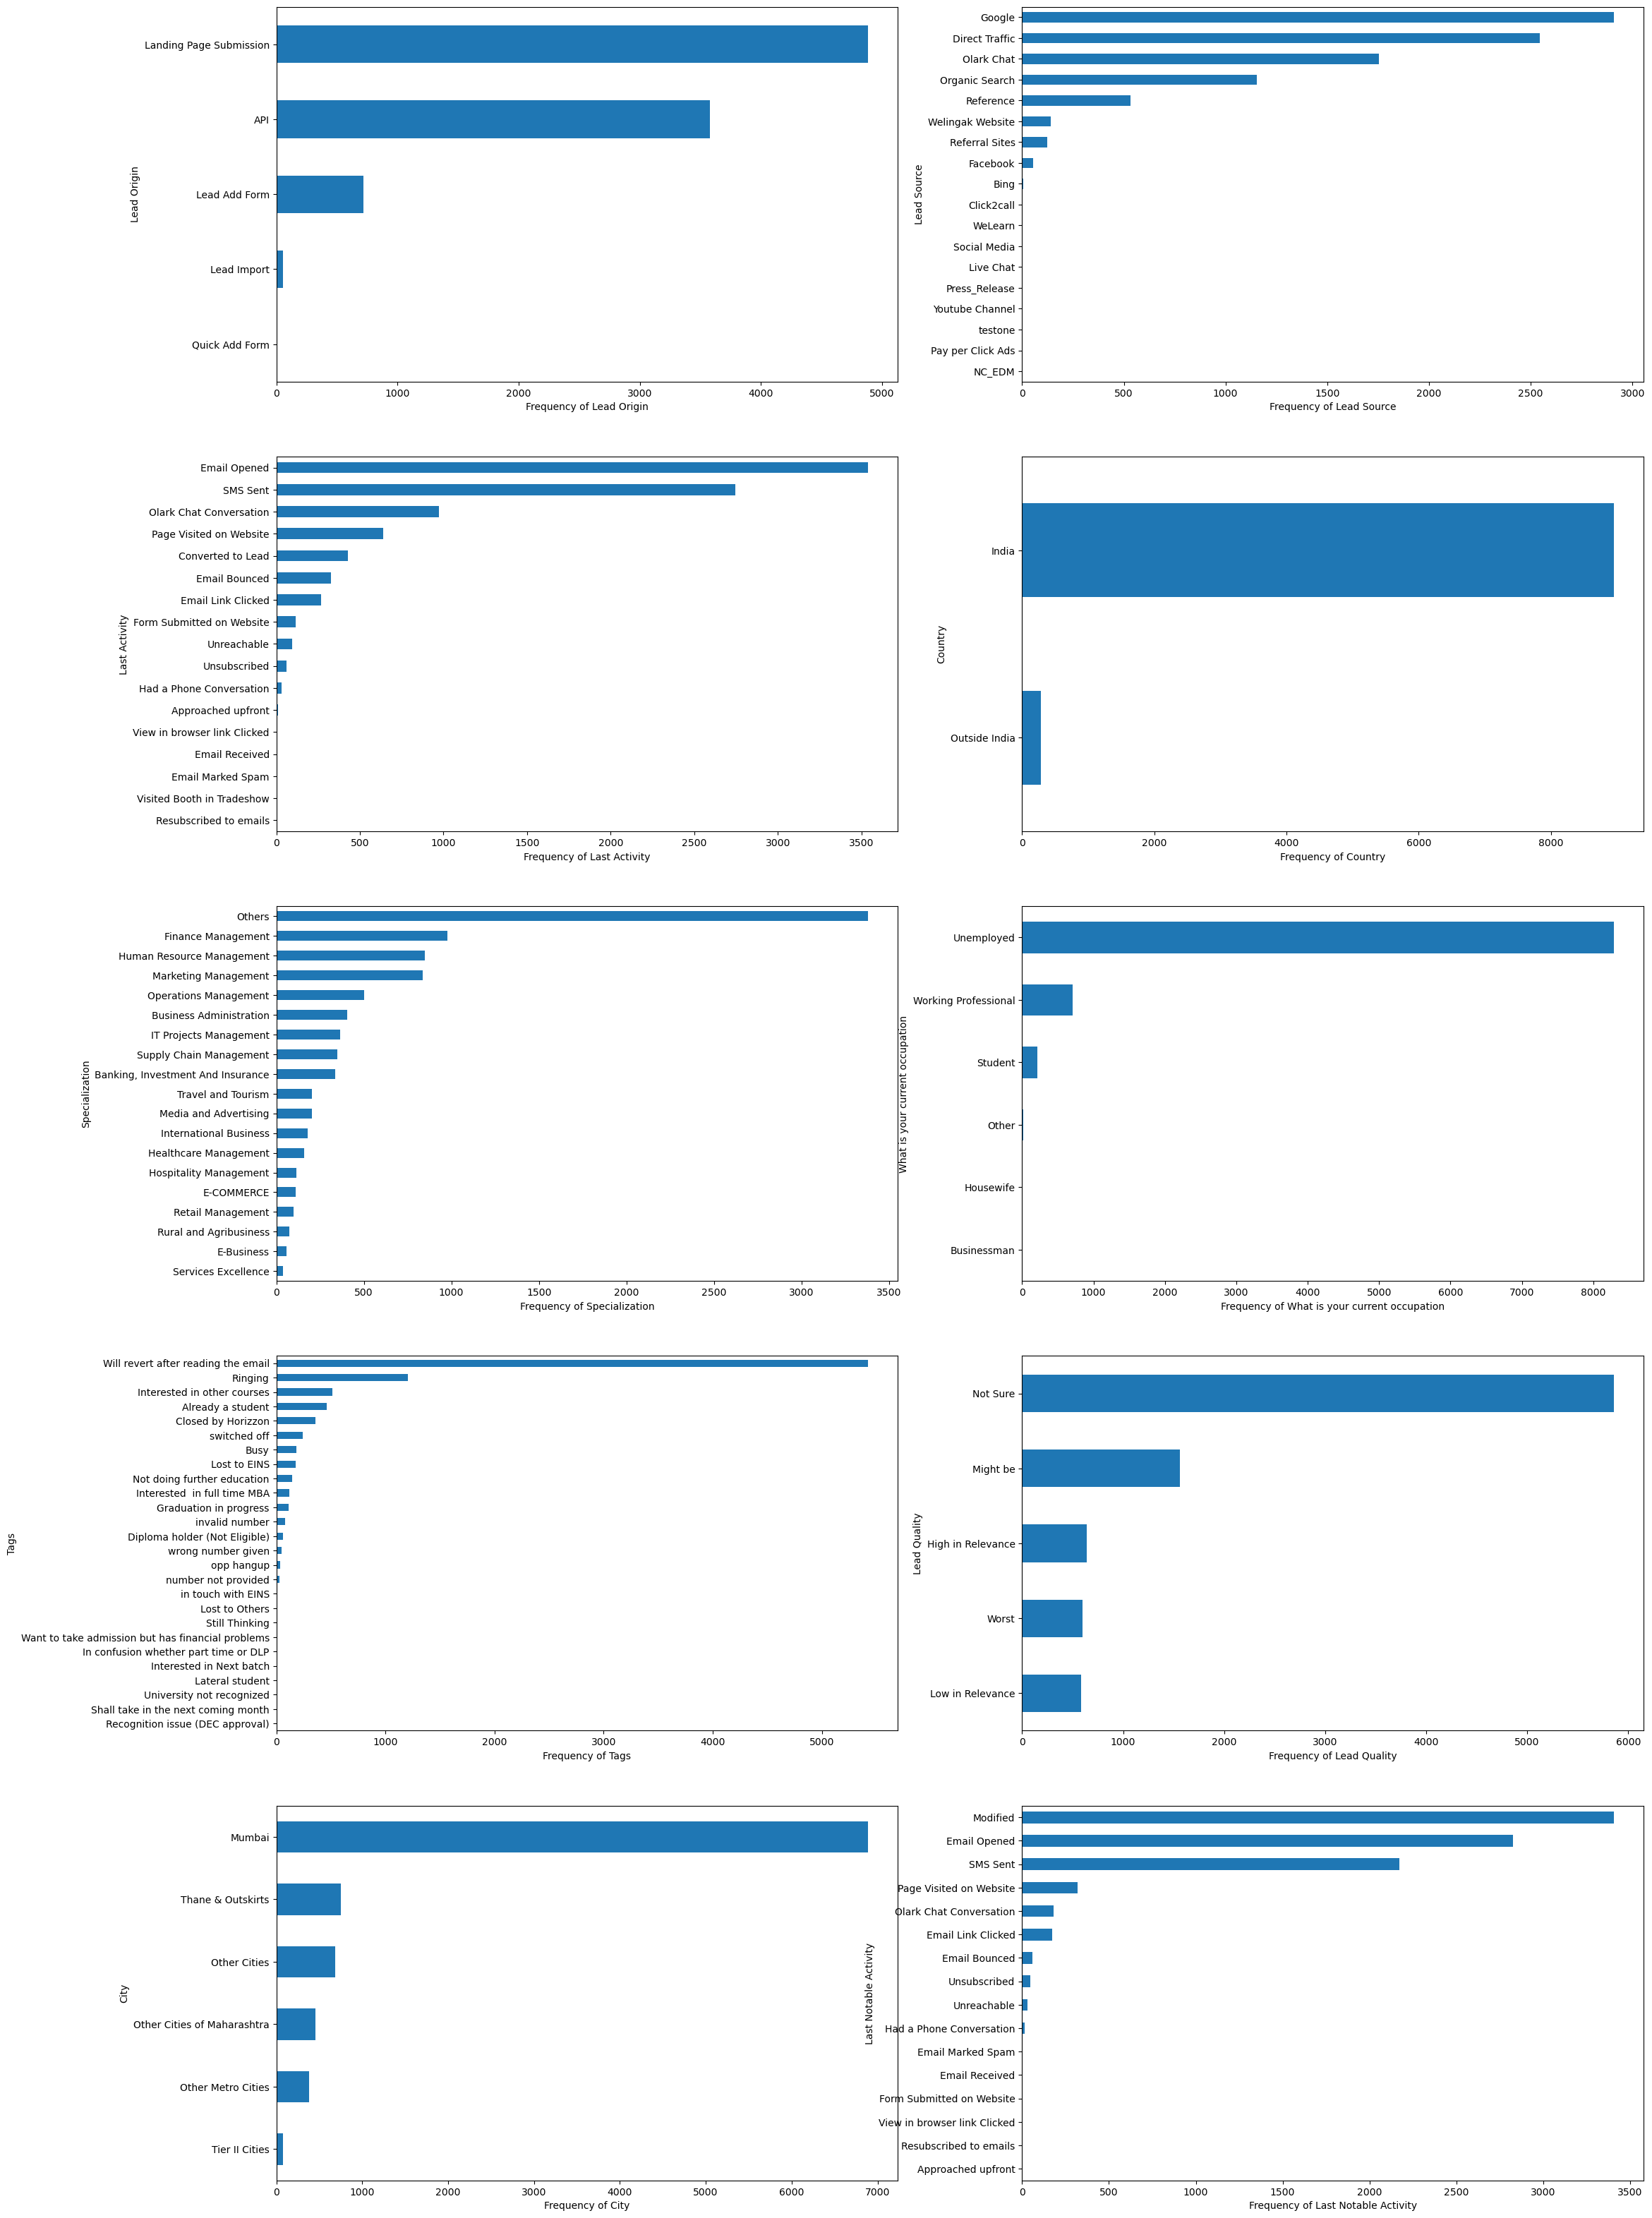

In [56]:
# Ploting Bar plot for all categorical variables
plt.figure(figsize=(25,40))

for i, var in enumerate(categorical_variables):
    plt.subplot(5,2,i+1)
    bar = leads[var].value_counts().sort_values(ascending=True).plot(kind='barh')
    bar.set(ylabel=var, xlabel=f"Frequency of {var}")
plt.show()

In [57]:
leads[numerical_variables].describe()

Lead Number  Do Not Email  Do Not Call  TotalVisits    Converted  \
count    9240.000000   9240.000000  9240.000000  9240.000000  9240.000000   
mean   617188.435606      0.079437     0.000216     3.438636     0.385390   
std     23405.995698      0.270435     0.014711     4.819024     0.486714   
min    579533.000000      0.000000     0.000000     0.000000     0.000000   
25%    596484.500000      0.000000     0.000000     1.000000     0.000000   
50%    615479.000000      0.000000     0.000000     3.000000     0.000000   
75%    637387.250000      0.000000     0.000000     5.000000     1.000000   
max    660737.000000      1.000000     1.000000   251.000000     1.000000   

       Total Time Spent on Website  Page Views Per Visit       Search  \
count                  9240.000000           9240.000000  9240.000000   
mean                    487.698268              2.362820     0.001515   
std                     548.021466              2.145333     0.038898   
min                       0.000000              0.000000     0.000000   
25%                      12.000000              1.000000     0.000000   
50%                     248.000000              2.000000     0.000000   
75%                     936.000000              3.000000     0.000000   
max                    2272.000000             55.000000     1.000000   

       Magazine  Newspaper Article  X Education Forums    Newspaper  \
count    9240.0        9240.000000         9240.000000  9240.000000   
mean        0.0           0.000216            0.000108     0.000108   
std         0.0           0.014711            0.010403     0.010403   
min         0.0           0.000000            0.000000     0.000000   
25%         0.0           0.000000            0.000000     0.000000   
50%         0.0           0.000000            0.000000     0.000000   
75%         0.0           0.000000            0.000000     0.000000   
max         0.0           1.000000            1.000000     1.000000   

       Digital Advertisement  Through Recommendations  \
count            9240.000000              9240.000000   
mean                0.000433                 0.000758   
std                 0.020803                 0.027515   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 0.000000                 0.000000   
max                 1.000000                 1.000000   

       Receive More Updates About Our Courses  \
count                                  9240.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
25%                                       0.0   
50%                                       0.0   
75%                                       0.0   
max                                       0.0   

       Update me on Supply Chain Content  Get updates on DM Content  \
count                             9240.0                     9240.0   
mean                                 0.0                        0.0   
std                                  0.0                        0.0   
min                                  0.0                        0.0   
25%                                  0.0                        0.0   
50%                                  0.0                        0.0   
75%                                  0.0                        0.0   
max                                  0.0                        0.0   

       I agree to pay the amount through cheque  \
count                                    9240.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max          

### Bivariate Analysis

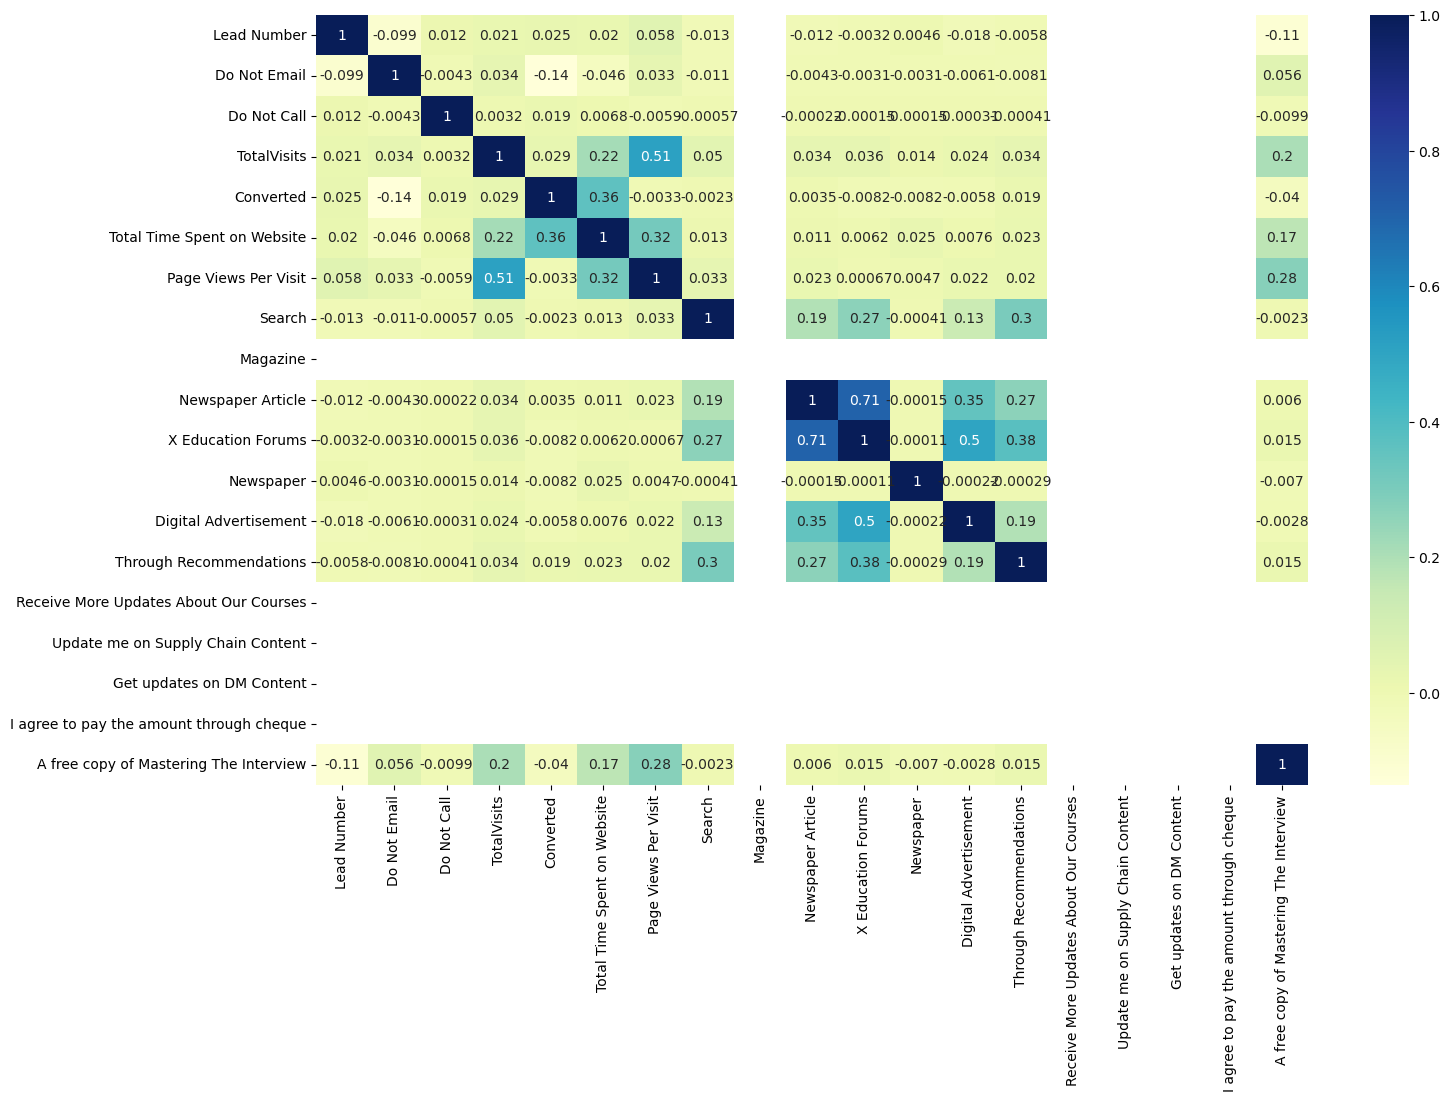

In [58]:
# Correlation between all numerical variables

plt.figure(figsize=(16, 10))
sns.heatmap(leads[numerical_variables].corr(), annot=True, cmap="YlGnBu")
plt.show()

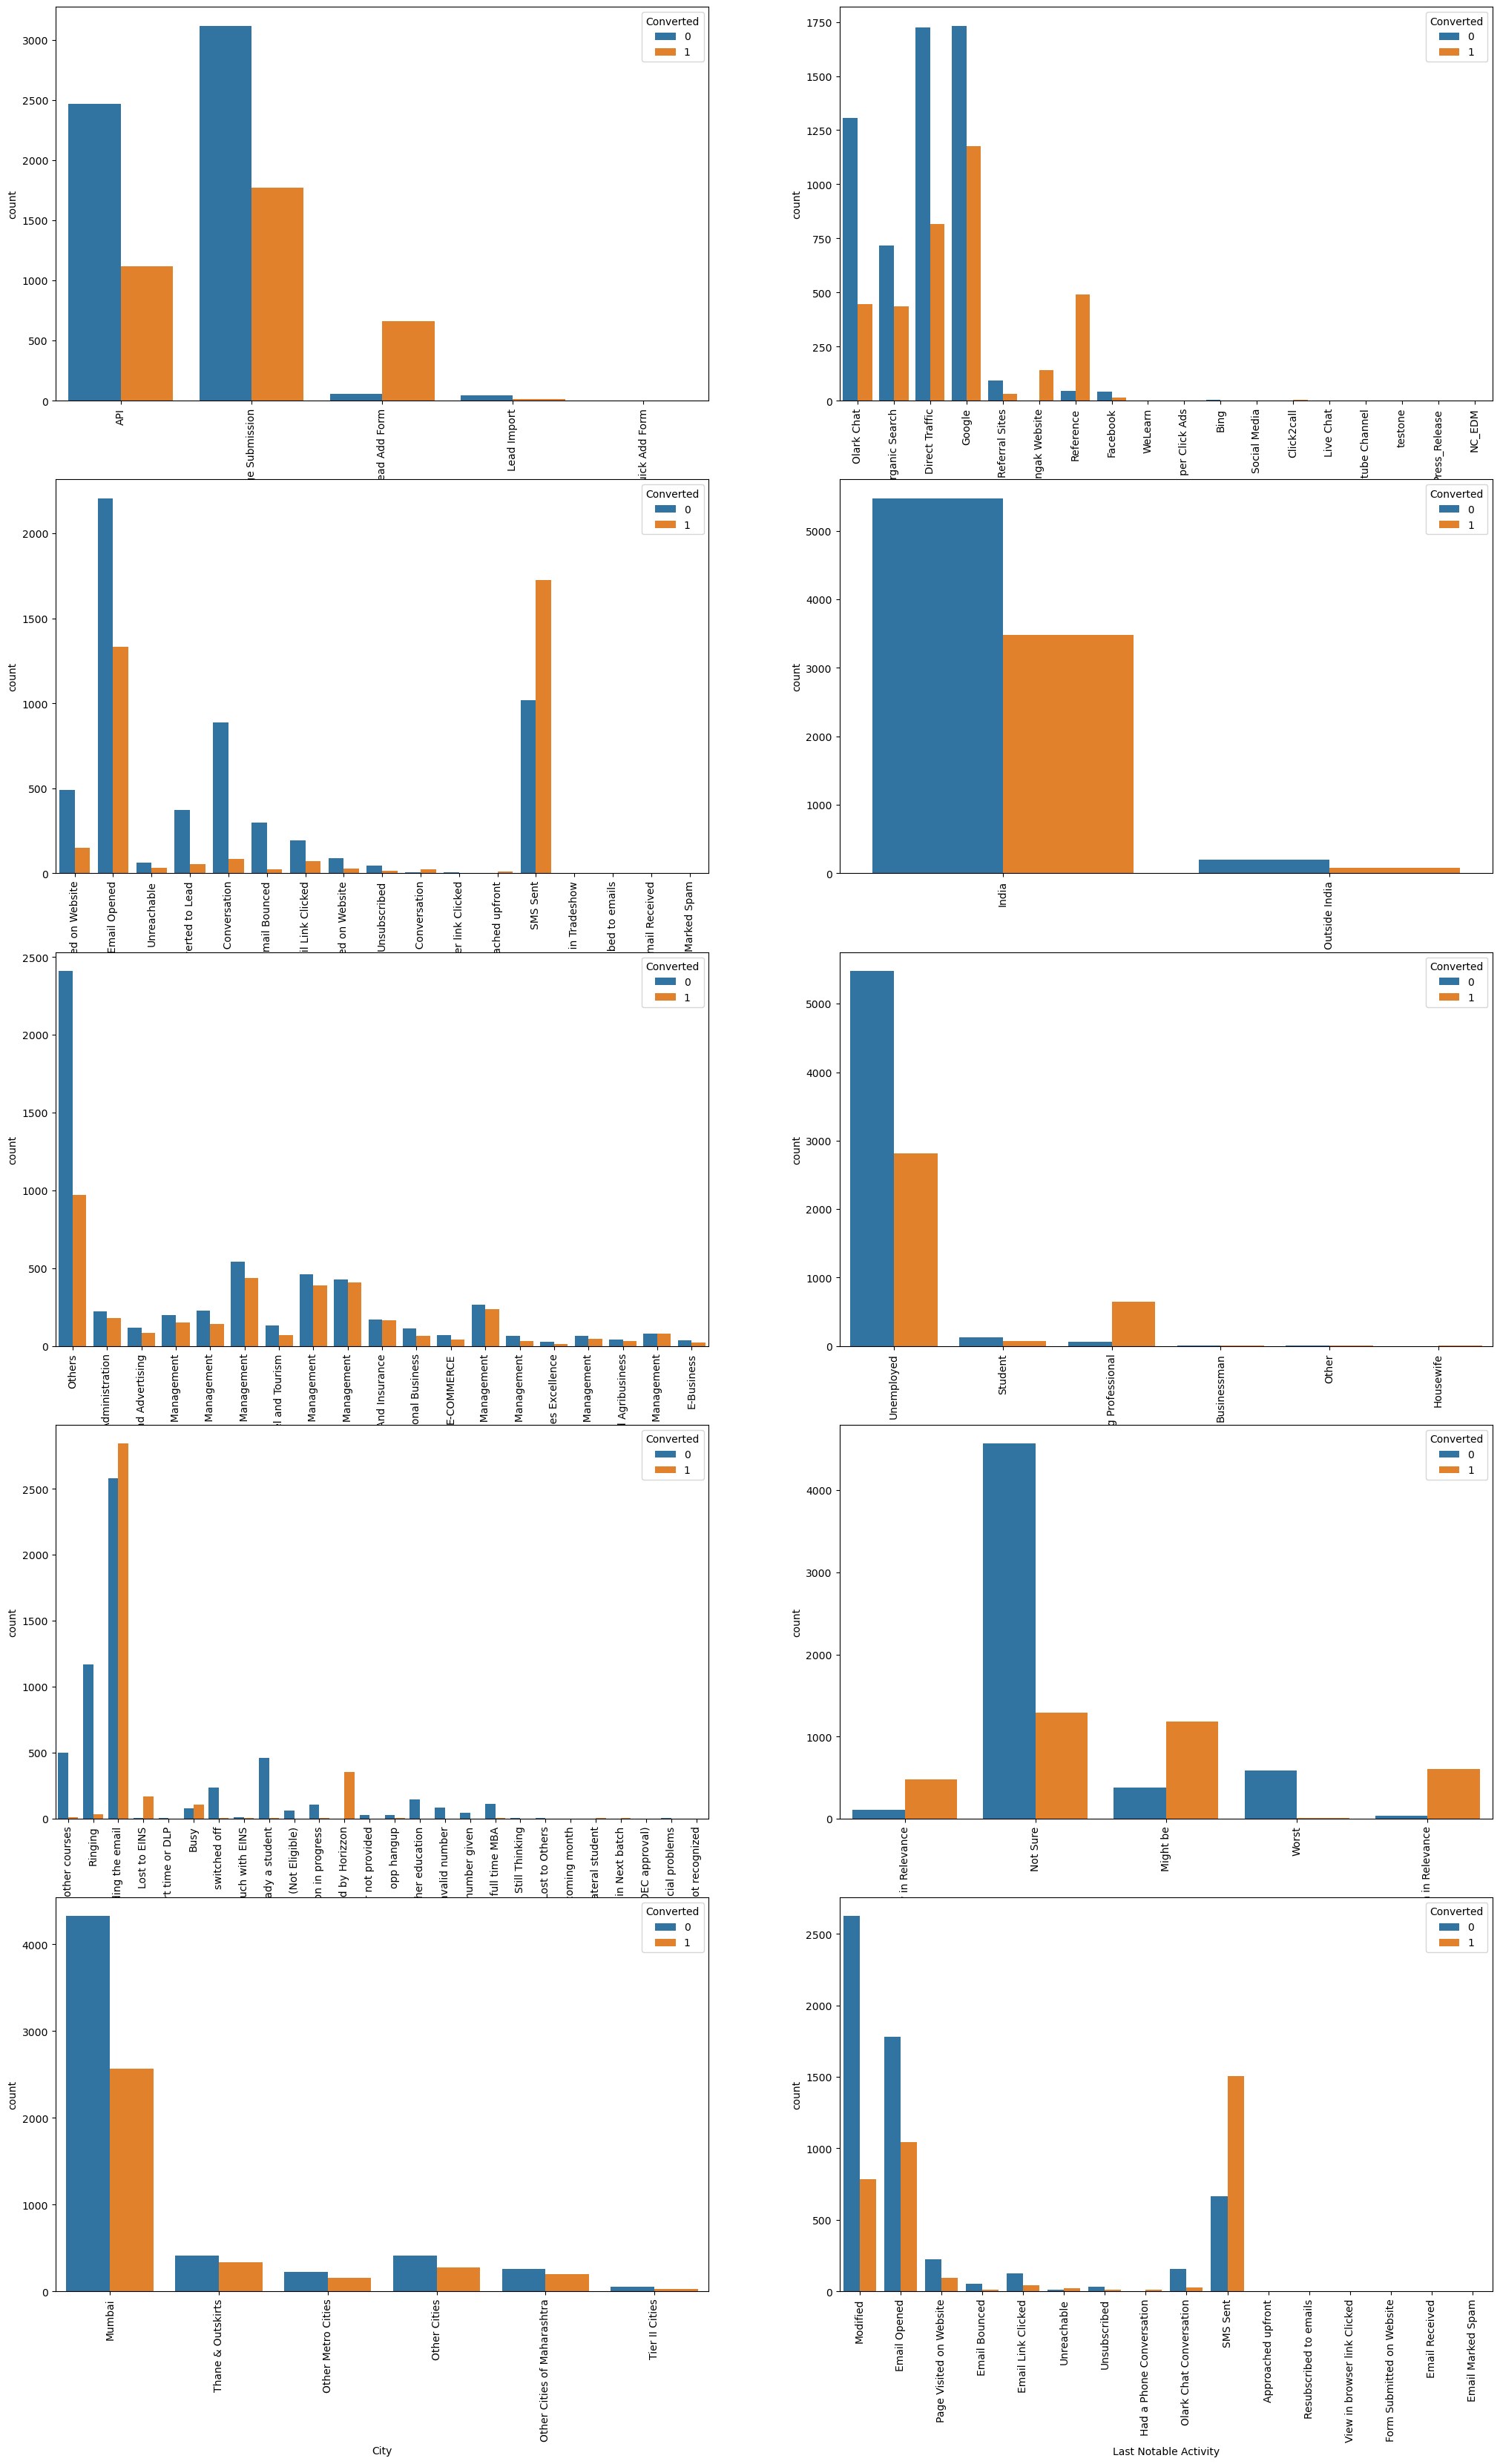

In [59]:
plt.figure(figsize=(25,40))

for i, var in enumerate(categorical_variables):
    plt.subplot(5,2,i+1)
    sns.countplot(x=var, hue='Converted', data=leads).tick_params(axis='x', rotation = 90)
    bar.set(ylabel=var, xlabel=f"Frequency of {var}")
plt.show()

In [60]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads[categorical_variables], drop_first=True)
# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit            Last Activity  ...  \
0                   0.0  Page Visited on Website  ...   
1                   2.5             Email Opened  ...   
2                   2.0             Email Opened  ...   
3                   1.0              Unreachable  ...   
4                   1.0        Converted to Lead  ...   

  Last Notable Activity_Form Submitted on Website  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              1   
1                              0   
2                              0   
3                              1   
4                              1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0

In [61]:

leads = leads.drop(categorical_variables, axis=1)
leads.head()


Lead Number  Do Not Email  Do Not Call  Converted  TotalVisits  \
0       660737             0            0          0          0.0   
1       660728             0            0          0          5.0   
2       660727             0            0          1          2.0   
3       660719             0            0          0          1.0   
4       660681             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  Magazine  \
0                            0                   0.0       0         0   
1                          674                   2.5       0         0   
2                         1532                   2.0       0         0   
3                          305                   1.0       0         0   
4                         1428                   1.0       0         0   

   Newspaper Article  ...  Last Notable Activity_Form Submitted on Website  \
0                  0  ...                                                0   
1                  0  ...                                                0   
2                  0  ...                                                0   
3                  0  ...                                                0   
4                  0  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

[5 rows x 129 columns]

In [62]:
leads.shape

(9240, 129)

### Test-Train Split

In [63]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

X.head()

Lead Number  Do Not Email  Do Not Call  TotalVisits  \
0       660737             0            0          0.0   
1       660728             0            0          5.0   
2       660727             0            0          2.0   
3       660719             0            0          1.0   
4       660681             0            0          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  Magazine  \
0                            0                   0.0       0         0   
1                          674                   2.5       0         0   
2                         1532                   2.0       0         0   
3                          305                   1.0       0         0   
4                         1428                   1.0       0         0   

   Newspaper Article  X Education Forums  ...  \
0                  0                   0  ...   
1                  0                   0  ...   
2                  0                   0  ...   
3                  0                   0  ...   
4                  0                   0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

[5 rows x 128 columns]

In [64]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [66]:
cols = ['Lead Number', 'Total Time Spent on Website', 'Magazine',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque']

In [67]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 129 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(17), uint8(110)
memory usage: 2.3 MB


In [68]:
scaler = StandardScaler()

X_train[cols] = scaler.fit_transform(X_train[cols])

X_train.head()

Lead Number  Do Not Email  Do Not Call  TotalVisits  \
1871     1.036534             0            0          0.0   
6795    -0.834353             0            0          4.0   
3516     0.412448             0            0          5.0   
8105    -1.251936             0            0          5.0   
3934     0.221650             0            0          0.0   

      Total Time Spent on Website  Page Views Per Visit  Search  Magazine  \
1871                    -0.885371                  0.00       0       0.0   
6795                     0.005716                  1.33       0       0.0   
3516                    -0.691418                  2.50       0       0.0   
8105                     1.365219                  5.00       0       0.0   
3934                    -0.885371                  0.00       0       0.0   

      Newspaper Article  X Education Forums  ...  \
1871                  0                   0  ...   
6795                  0                   0  ...   
3516                  0                   0  ...   
8105                  0                   0  ...   
3934                  0                   0  ...   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                                  0   
3934                               0                                  0   

      Last Notable Activity_Unsubscribed  \
1871                                   0   
6795                                   0   
3516                                   0   
8105                                   0   
3934                                   0   

      Last Notable Activity_View in browser link Clicked  
1871                                                  0   
6795                                                  0   
3516                                                  0   
810

In [69]:
# Checking the Churn Rate
converted_rate = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted_rate

38.53896103896104

We have 38.5% of Conversion Rate

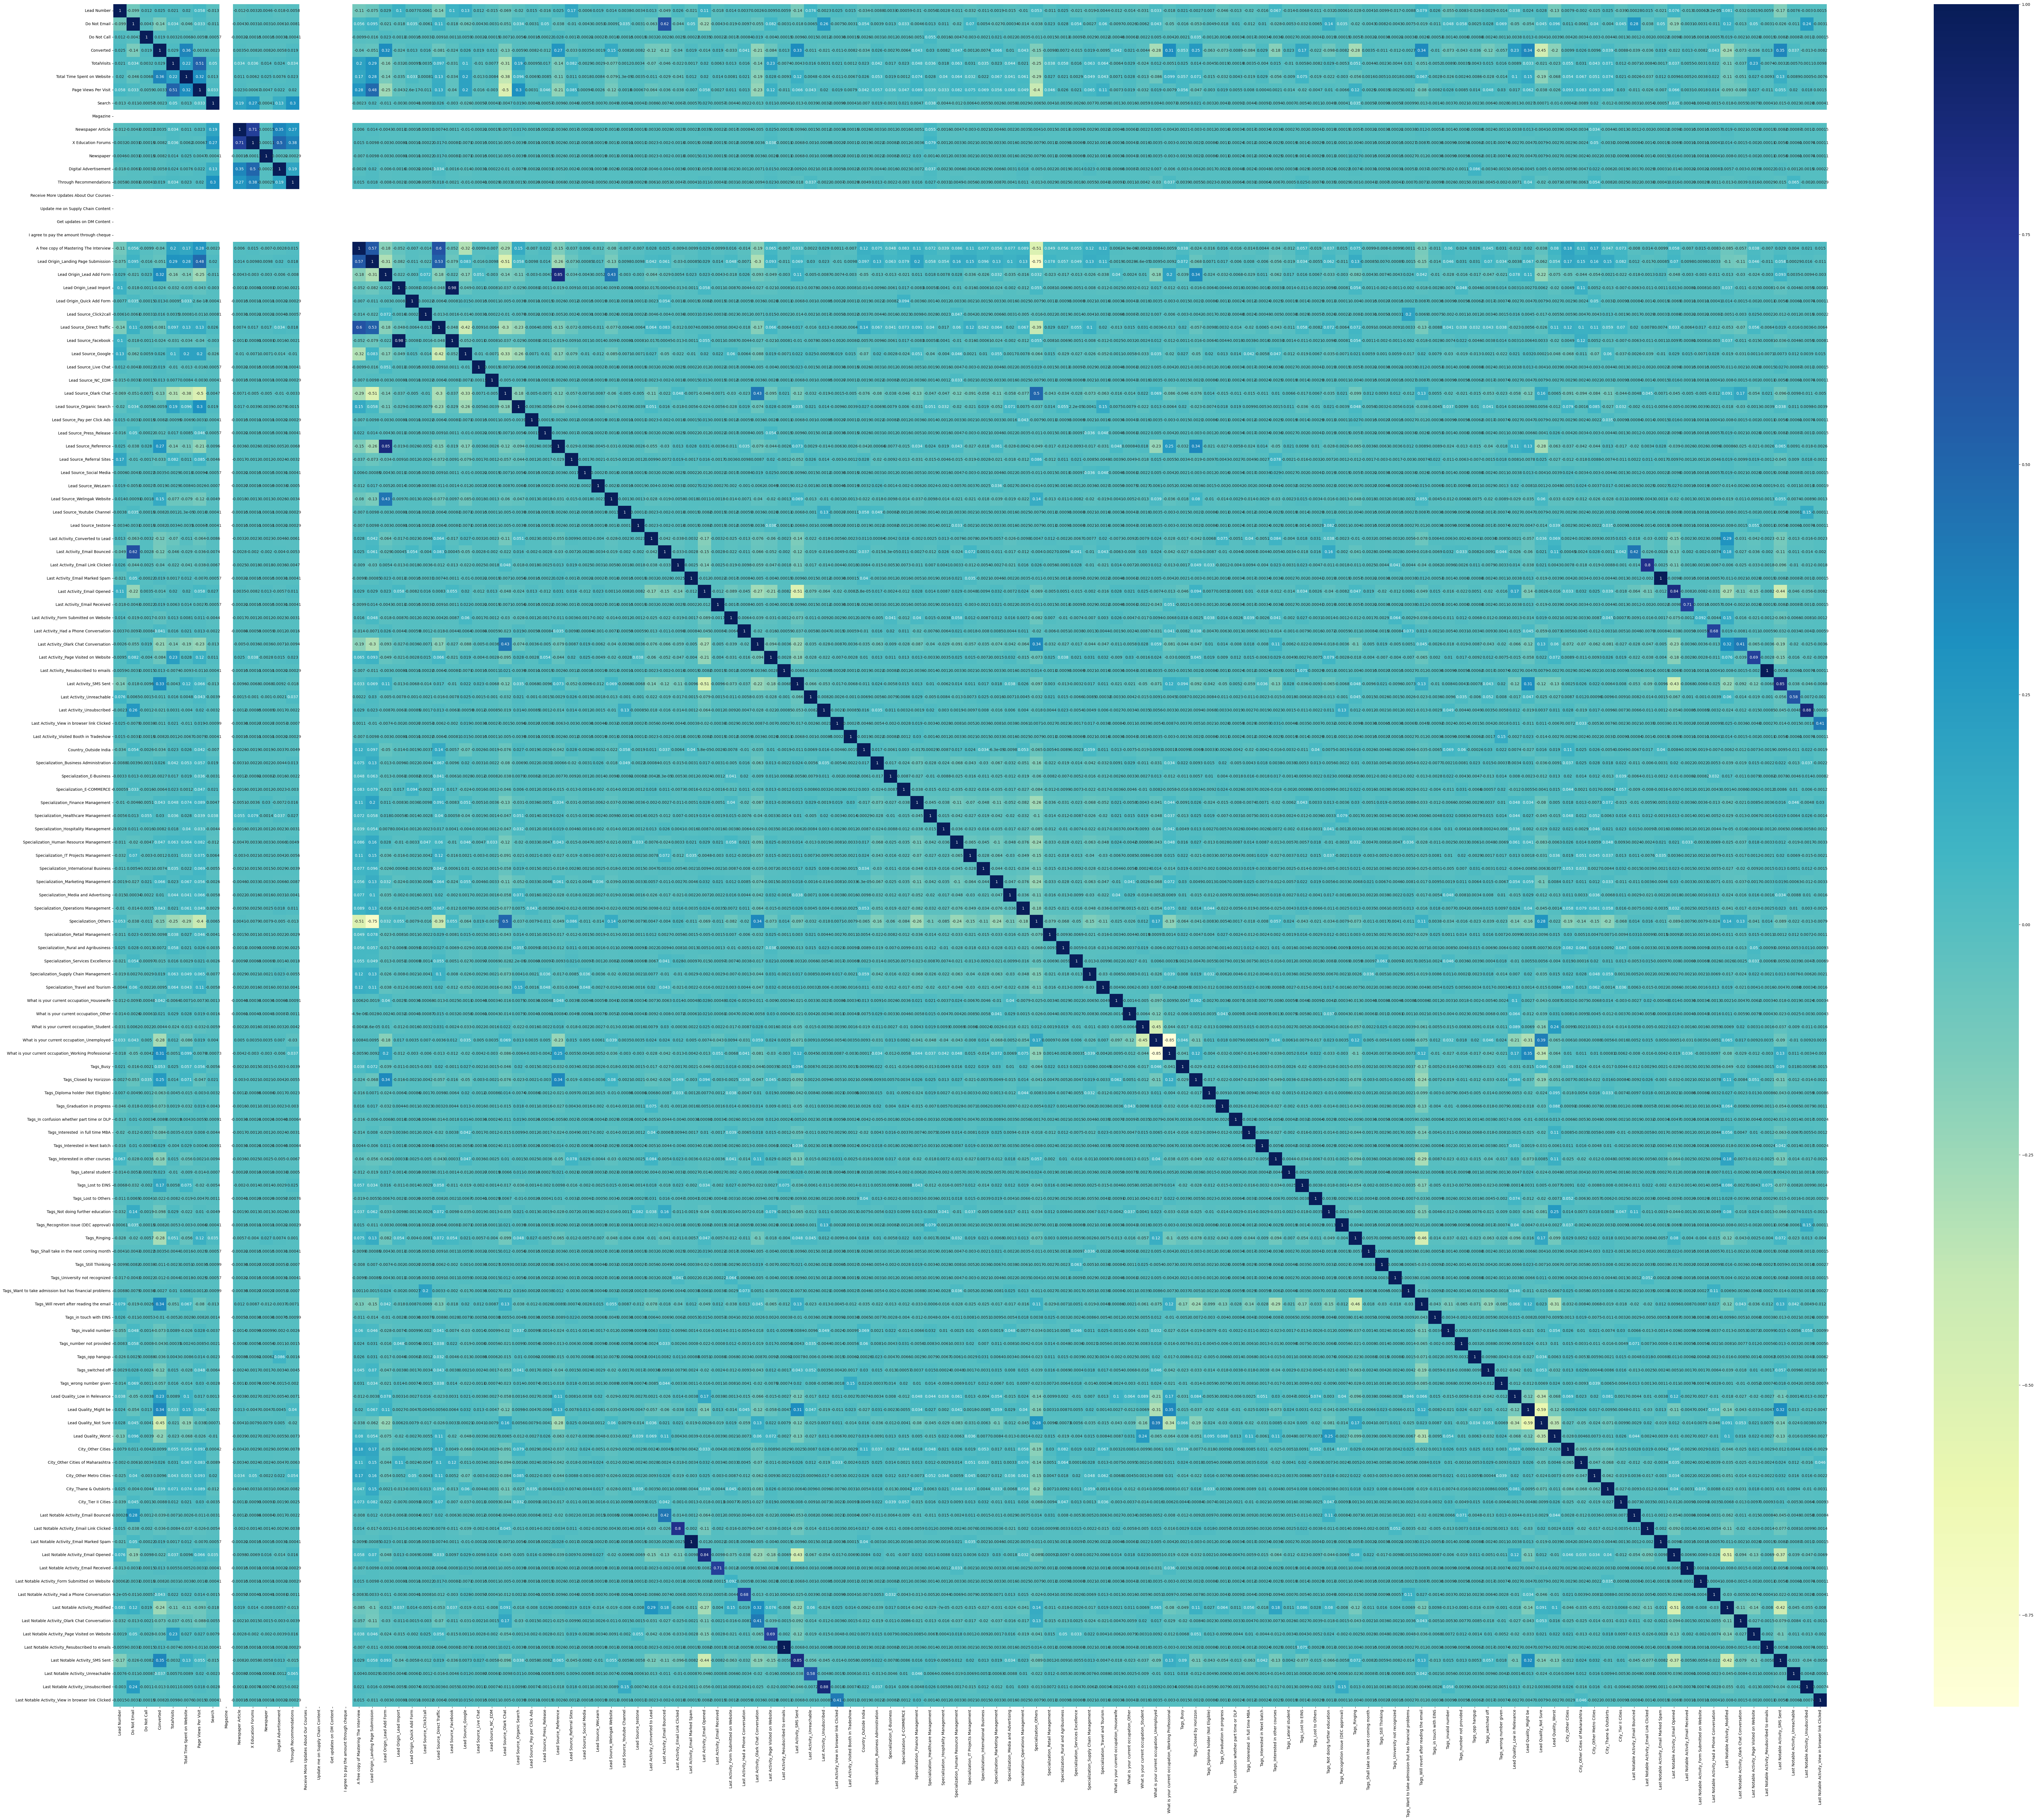

In [70]:
# Let's see the correlation matrix 
plt.figure(figsize=(100,80))
sns.heatmap(leads.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### Dropping highly correlated dummy variables

In [71]:
highly_corr = ['Last Activity_Unsubscribed',
               'Last Activity_Unreachable',
               'Last Activity_SMS Sent',
               'Last Activity_Resubscribed to emails',
               'Last Activity_Page Visited on Website',
               'Last Activity_Had a Phone Conversation',
               'Last Activity_Email Received',
               'Last Activity_Email Opened',
               'Last Activity_Email Marked Spam',
               'Last Activity_Email Link Clicked',
               'Lead Source_Facebook',
               'Lead Origin_Lead Add Form']

In [72]:
X_test = X_test.drop(highly_corr, axis=1)
X_train = X_train.drop(highly_corr, axis=1)

### Building Models

In [73]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                          108
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 14 May 2023   Deviance:                       68157.
Time:                        06:43:37   Pearson chi2:                 3.33e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -2.321e+14   3.99e+07  -5.81e+06      0.000   -2.32e+14   -2.32e+14
Lead Number                                             2.484e+13   9.14e+05   2.72e+07      0.000    2.48e+13    2.48e+13
Do Not Email                                           -1.596e+14   4.43e+06  -3.61e+07      0.000    -1.6e+14    -1.6e+14
Do Not Call                                             3.618e+15   4.78e+07   7.57e+07      0.000    3.62e+15    3.62e+15
TotalVisits                                              1.34e+13   1.89e+05   7.08e+07      0.000    1.34e+13    1.34e+13
Total Time Spent on Website                             2.724e+14   9.96e+05   2.74e+08      0.000    2.72e+14    2.72e+14
Page Views Per Visit                                   -1.368e+13   5.54e+05  -2.47e+07      0.000   -1.37e+13   -1.37e+13
Search                                                  2.435e+14   2.21e+07    1.1e+07      0.000    2.43e+14    2.43e+14
Magazine                                                  52.9324   6.57e-07   8.06e+07      0.000      52.932      52.932
Newspaper Article                                       4.303e+15   6.74e+07   6.39e+07      0.000     4.3e+15     4.3e+15
X Education Forums                                     -5.612e+15   1.12e+08  -5.03e+07      0.000   -5.61e+15   -5.61e+15
Newspaper                                              -4.192e+15   6.73e+07  -6.23e+07      0.000   -4.19e+15   -4.19e+15
Digital Advertisement                                  -3.738e+15   4.82e+07  -7.76e+07      0.000   -3.74e+15   -3.74e+15
Through Recommendations                                 1.872e+14   2.87e+07   6.53e+06      0.000    1.87e+14    1.87e+14
Receive More Updates About Our Courses                    -8.3523   3.55e-07  -2.35e+07      0.000      -8.352      -8.352
Update me on Supply Chain Content                        -31.5983    3.8e-07  -8.31e+07      0.000     -31.598     -31.598
Get updates on DM Content                                 35.6719   7.48e-07   4.77e+07      0.000      35.672      35.672
I agree to pay the amount through cheque                 -24.1899   3.32e-07  -7.29e+07      0.000     -24.190     -24.190
A free copy of Mastering The Interview                 -4.654e+13    2.7e+06  -1.72e+07      0.000   -4.65e+13   -4.65e+13
Lead Origin_Landing Page Submission                    -3.756e+14   3.42e+06   -1.1e+08      0.000   -3.76e+14   -3.76e+14
Lead Origin_Lead Import                                 1.109e+15   3.19e+07   3.48e+07      0.000    1.11e+15    1.11e+15
Lead Origin_Quick Add Form                              3.477e+15    6.8e+07   5.11e+07      0.000    3.48e+15    3.48e+15
Lead Sou

### Feature Selection Using RFE

In [74]:
logreg = LogisticRegression()

In [75]:
rfe = RFE(estimator=logreg, n_features_to_select=10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

In [76]:
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [77]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 78),
 ('Do Not Email', False, 21),
 ('Do Not Call', False, 47),
 ('TotalVisits', False, 88),
 ('Total Time Spent on Website', False, 18),
 ('Page Views Per Visit', False, 84),
 ('Search', False, 49),
 ('Magazine', False, 101),
 ('Newspaper Article', False, 94),
 ('X Education Forums', False, 66),
 ('Newspaper', False, 89),
 ('Digital Advertisement', False, 53),
 ('Through Recommendations', False, 87),
 ('Receive More Updates About Our Courses', False, 103),
 ('Update me on Supply Chain Content', False, 104),
 ('Get updates on DM Content', False, 105),
 ('I agree to pay the amount through cheque', False, 106),
 ('A free copy of Mastering The Interview', False, 70),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Origin_Quick Add Form', False, 57),
 ('Lead Source_Click2call', False, 67),
 ('Lead Source_Direct Traffic', False, 35),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Live Chat', False, 55),
 ('Lea

In [78]:
col = X_train.columns[rfe.support_]

In [79]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=106)

##### Assessing the model with StatsModels

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1669.6
Date:                Sun, 14 May 2023   Deviance:                       3339.1
Time:                        06:43:53   Pearson chi2:                 3.46e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5565
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8294      0.199     -9.190      0.000      -2.220      -1.439
Lead Source_Welingak Website                 4.2498      0.730      5.820      0.000       2.819       5.681
Tags_Busy                                    3.9058      0.320     12.196      0.000       3.278       4.534
Tags_Closed by Horizzon                      9.1052      1.034      8.808      0.000       7.079      11.131
Tags_Lost to EINS                            9.2197      0.747     12.336      0.000       7.755      10.685
Tags_Ringing                                -1.7371      0.312     -5.560      0.000      -2.349      -1.125
Tags_Will revert after reading the email     3.9669      0.219     18.148      0.000       3.538       4.395
Tags_switched off                           -2.5599      0.581     -4.409      0.000      -3.698      -1.422
Lead Quality_Not Sure                       -3.6809      0.123    -29.842      0.000      -3.923      -3.439
Lead Quality_Worst                          -3.6716      0.681     -5.394      0.000      -5.006      -2.337
Last Notable Activity_SMS Sent               2.7042      0.117     23.211      0.000       2.476       2.933
============================================================================================================
"""

In [81]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.000712
6795    0.176048
3516    0.000712
8105    0.296875
3934    0.176048
4844    0.992169
3297    0.000712
8071    0.999308
987     0.176048
7423    0.992169
dtype: float64

In [82]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([7.11550873e-04, 1.76048456e-01, 7.11550873e-04, 2.96875362e-01,
       1.76048456e-01, 9.92168801e-01, 7.11550873e-04, 9.99308364e-01,
       1.76048456e-01, 9.92168801e-01])

In [83]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Probability  Prospect ID
0          0                0.000712         1871
1          0                0.176048         6795
2          0                0.000712         3516
3          0                0.296875         8105
4          0                0.176048         3934

#### Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0

In [84]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Probability  Prospect ID  predicted
0          0                0.000712         1871          0
1          0                0.176048         6795          0
2          0                0.000712         3516          0
3          0                0.296875         8105          0
4          0                0.176048         3934          0

#### Confustion Matrix

In [85]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3846  156]
 [ 369 2097]]


In [86]:
# Predicted       not_converted    converted
# Actual
# not_converted   3846             156
# converted       369              2097

In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9188311688311688


#### Checking VIFs

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                         Tags_switched off  1.12
1                                 Tags_Busy  1.10
0              Lead Source_Welingak Website  1.04
3                         Tags_Lost to EINS  1.03
2                   Tags_Closed by Horizzon  1.01
8                        Lead Quality_Worst  0.38
4                              Tags_Ringing  0.14
5  Tags_Will revert after reading the email  0.13
7                     Lead Quality_Not Sure  0.02
9            Last Notable Activity_SMS Sent  0.00

No need to drop any columns as VIFs are in reasonable values

### Other Metrics

In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Let's see the Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8503649635036497

In [91]:
# Let us calculate Specificity
TN / float(TN+FP)

0.9610194902548725

In [92]:
# Calculate False Postive Rate - predicting convertion when customer does not have converted
print(FP/ float(TN+FP))

0.038980509745127435


In [93]:
# Positive Predictive Value 
print (TP / float(TP+FP))

0.9307589880159787


In [94]:
# Negative Predictive Value
print (TN / float(TN+ FN))

0.9124555160142349


### Plotting the ROC Curve

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )

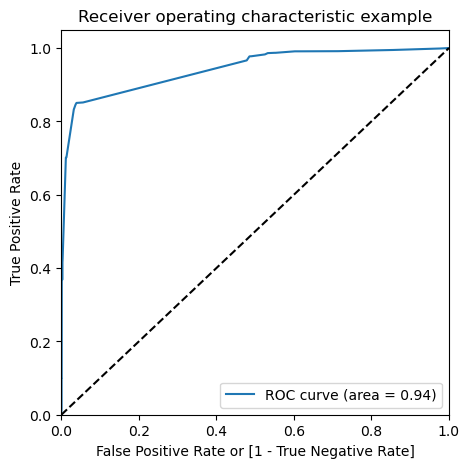

In [97]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

### Finding Optimal Cutoff Point

In [98]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Probability  Prospect ID  predicted  0.0  0.1  0.2  \
0          0                0.000712         1871          0    1    0    0   
1          0                0.176048         6795          0    1    1    0   
2          0                0.000712         3516          0    1    0    0   
3          0                0.296875         8105          0    1    1    1   
4          0                0.176048         3934          0    1    1    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0

In [99]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.668831  0.982563  0.475512
0.2   0.2  0.909091  0.851582  0.944528
0.3   0.3  0.918831  0.850365  0.961019
0.4   0.4  0.918831  0.850365  0.961019
0.5   0.5  0.918831  0.850365  0.961019
0.6   0.6  0.918831  0.850365  0.961019
0.7   0.7  0.918831  0.850365  0.961019
0.8   0.8  0.878324  0.701946  0.987006
0.9   0.9  0.779375  0.426602  0.996752


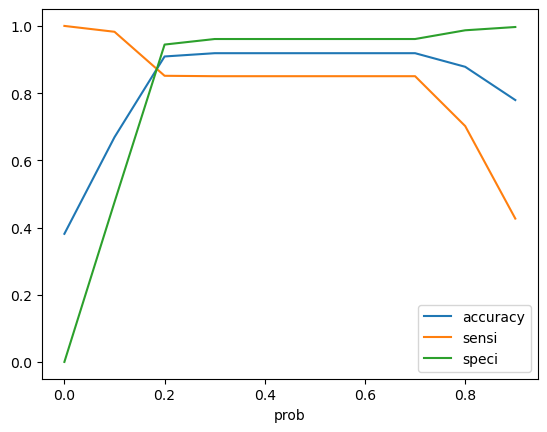

In [100]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

In [101]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

Converted  Conversion_Probability  Prospect ID  predicted  0.0  0.1  0.2  \
0          0                0.000712         1871          0    1    0    0   
1          0                0.176048         6795          0    1    1    0   
2          0                0.000712         3516          0    1    0    0   
3          0                0.296875         8105          0    1    1    1   
4          0                0.176048         3934          0    1    1    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0    0                0  
2    0    0    0    0    0    0    0                0  
3    0    0    0    0    0    0    0                1  
4    0    0    0    0    0    0    0                0

#### Overall Accuracy.

In [102]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9090909090909091

In [103]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3780,  222],
       [ 366, 2100]], dtype=int64)

In [104]:
TP = confusion2[1,1] # True Positive 
TN = confusion2[0,0] # True Negatives
FP = confusion2[0,1] # False Positives
FN = confusion2[1,0] # False Negatives

In [105]:
# Let's see the Sensitivity
TP / float(TP+FN)

0.851581508515815

In [106]:
# Let us calculate Specificity
TN / float(TN+FP)

0.9445277361319341

In [107]:
# Calculate False Postive Rate
print(FP/ float(TN+FP))

0.05547226386806597


In [108]:
# Positive Predictive Value 
print (TP / float(TP+FP))

0.9043927648578811


In [109]:
# Negative Predictive Value
print (TN / float(TN+ FN))

0.9117221418234442


### Precision and Recall

In [110]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3846,  156],
       [ 369, 2097]], dtype=int64)

#### Precision Score

In [111]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9307589880159787

#### Recall Score

In [112]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8503649635036497

In [113]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

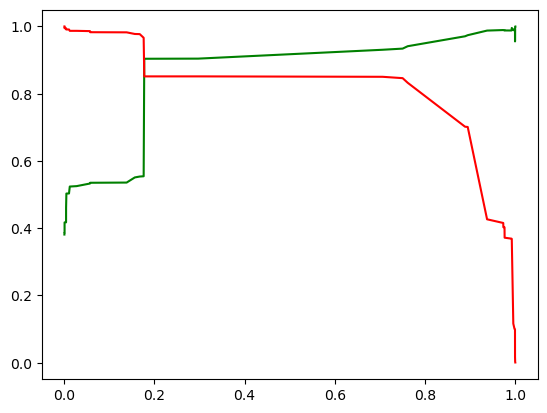

In [115]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [116]:
X_test[cols] = scaler.transform(X_test[cols])

In [117]:
X_test = X_test[col]
X_test.head()

Lead Source_Welingak Website  Tags_Busy  Tags_Closed by Horizzon  \
4269                             0          0                        0   
2376                             0          0                        0   
7766                             0          0                        0   
9199                             0          0                        0   
4359                             0          0                        0   

      Tags_Lost to EINS  Tags_Ringing  \
4269                  0             0   
2376                  0             0   
7766                  0             0   
9199                  0             0   
4359                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
4269                                         1                  0   
2376                                         1                  0   
7766                                         1                  0   
9199                                         0                  0   
4359                                         1                  0   

      Lead Quality_Not Sure  Lead Quality_Worst  \
4269                      1                   0   
2376                      0                   0   
7766                      0                   0   
9199                      1                   0   
4359                      0                   0   

      Last Notable Activity_SMS Sent  
4269                               1  
2376                               1  
7766                               0  
9199                               0  
4359                               0

In [118]:
X_test_sm = sm.add_constant(X_test)

In [119]:
# Prediction on Test set
y_test_pred = res.predict(X_test_sm)

In [120]:
y_test_pred.head()

4269    0.761495
2376    0.992169
7766    0.894498
9199    0.004029
4359    0.894498
dtype: float64

In [121]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [122]:
# Let's see the head
y_pred_1.head()

0
4269  0.761495
2376  0.992169
7766  0.894498
9199  0.004029
4359  0.894498

In [123]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [124]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [125]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [126]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [127]:
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.761495
1          1         2376  0.992169
2          1         7766  0.894498
3          0         9199  0.004029
4          1         4359  0.894498

In [128]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={0: 'Conversion_Probability'})

In [129]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID', 'Converted', 'Conversion_Probability'])

In [130]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Conversion_Probability
0         4269          1                0.761495
1         2376          1                0.992169
2         7766          1                0.894498
3         9199          0                0.004029
4         4359          1                0.894498

In [131]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.2 else 0)

In [132]:
y_pred_final.head()

Prospect ID  Converted  Conversion_Probability  final_predicted
0         4269          1                0.761495                1
1         2376          1                0.992169                1
2         7766          1                0.894498                1
3         9199          0                0.004029                0
4         4359          1                0.894498                1

#### Let's check the overall accuracy.

In [133]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9116161616161617

In [134]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1583,   94],
       [ 151,  944]], dtype=int64)

In [135]:
TP = confusion2[1,1] # True Positive 
TN = confusion2[0,0] # True Negatives
FP = confusion2[0,1] # False Positives
FN = confusion2[1,0] # False Negatives

In [136]:
# Sensitivity
TP / float(TP+FN)

0.8621004566210045

In [137]:
# Specificity
TN / float(TN+FP)

0.9439475253428742